<a href="https://colab.research.google.com/github/MAR123EREE/Laboratorio_02/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de programación Regresión Polinomial

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 2 Regresión polinomica
<a id="section4"></a>
### 2.1 Normalización de caracteristicas

In [ ]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/Data_sets/Lab_2/train.csv', delimiter=',')
X = data.iloc[:, :1]
y = data.iloc[:, 1]

m = y.size
data.head()


,ID,date,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2,appliances
0,2133,2016-01-26 12:30:00,0,19.890000,45.50,19.200000,45.090000,20.390000,44.290000,19.10,...,48.700000,10.300000,761.900000,85.500000,7.500000,23.500000,7.950000,39.240863,39.240863,3.912023
1,19730,2016-05-27 17:20:00,0,25.566667,46.56,25.890000,42.025714,27.200000,41.163333,24.70,...,46.790000,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,4.605170
2,3288,2016-02-03 13:00:00,0,22.500000,44.43,21.533333,42.590000,21.963333,44.555000,22.00,...,45.530000,6.600000,760.200000,64.000000,8.000000,40.000000,0.200000,42.054659,42.054659,4.248495
3,7730,2016-03-05 09:20:00,0,19.790000,38.06,17.200000,40.933333,20.600000,37.163333,18.39,...,40.723333,2.100000,741.533333,94.333333,1.000000,48.666667,1.233333,12.615865,12.615865,3.688879
4,8852,2016-03-13 04:20:00,0,20.600000,35.29,17.100000,39.790000,20.290000,37.000000,19.50,...,40.090000,-0.866667,768.266667,92.333333,1.666667,34.000000,-1.933333,10.897926,10.897926,3.688879


In [ ]:
def plotData(X, y):
    # Grafica los puntos x e y en una figura nueva.
    fig = pyplot.figure()  # abre una nueva figura

    # Plotea los datos
    pyplot.plot(X, y, 'ro', ms=10, mec='k')

    # Etiquetas de los ejes
    pyplot.ylabel('Fechas y horas')
    pyplot.xlabel('Rentas') # Changed 'xlabellabel' to 'xlabel'

No tomé todos los datos para graficar y le coloqué un límite de los primeros 15 datos

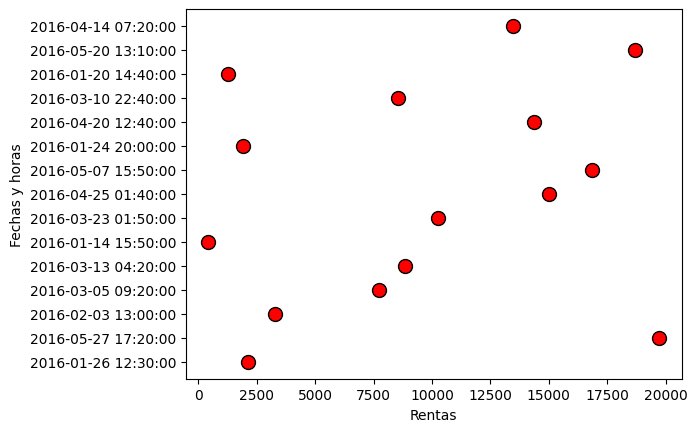

In [ ]:
plotData(X[:15], y[:15])

In [ ]:
X = np.concatenate([X, X * X], axis=1)

In [ ]:
print(X)

[[8.98000000e+03 8.06404000e+07]
 [2.75400000e+03 7.58451600e+06]
 [9.13200000e+03 8.33934240e+07]
 ...
 [1.40880000e+04 1.98471744e+08]
 [1.73560000e+04 3.01230736e+08]
 [1.75470000e+04 3.07897209e+08]]


In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

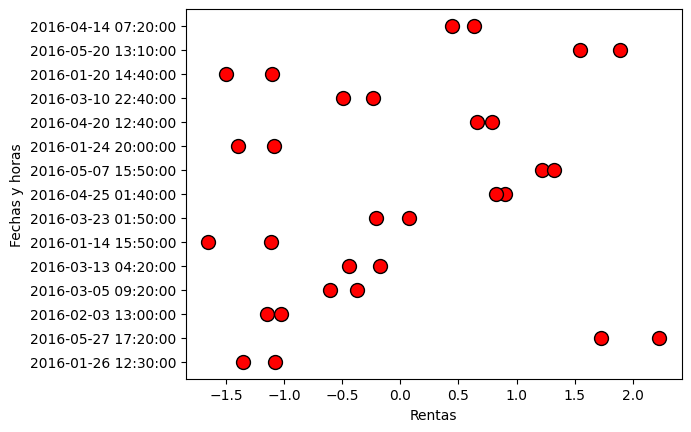

In [ ]:
def plotData(X, y, sample_size=15):
    # Seleccionar los primeros N puntos
    X_sample = X[:sample_size]
    y_sample = y[:sample_size]

    # Grafica los puntos
    fig = pyplot.figure()
    pyplot.plot(X_sample, y_sample, 'ro', ms=10, mec='k')
    pyplot.ylabel('Fechas y horas')
    pyplot.xlabel('Rentas')
    pyplot.show()

plotData(X_norm, y, sample_size=15)

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.35480133 -1.07945006]
 [ 1.          1.72550195  2.22818429]
 [ 1.         -1.15262197 -1.02561931]
 ...
 [ 1.         -0.78467303 -0.86879208]
 [ 1.         -1.57763625 -1.11220707]
 [ 1.          1.03669173  1.02634076]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # Convert y to a NumPy array of floats to ensure numerical operations
    y = y.to_numpy().astype(float)

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        # Now that y is a NumPy array of floats, this operation should work
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

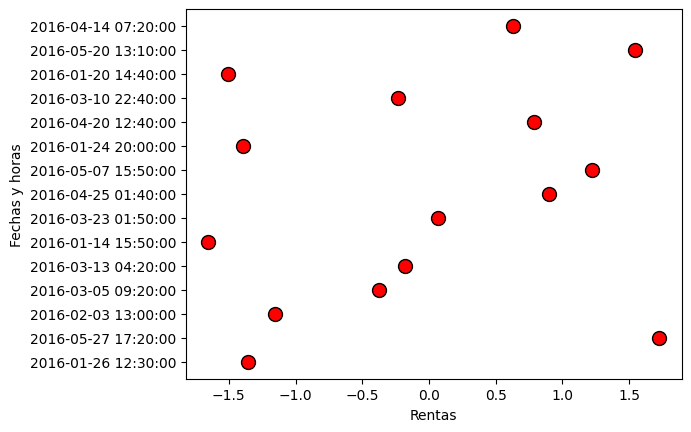

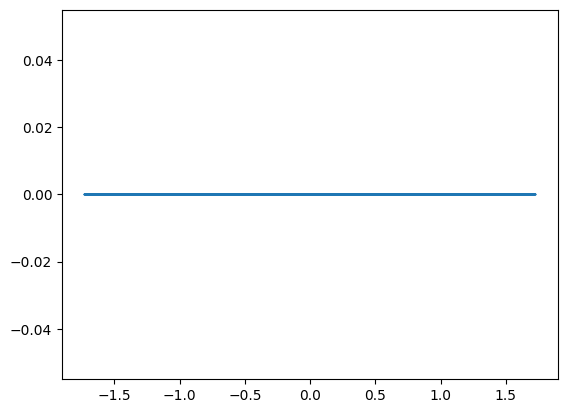

In [ ]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [ ]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [ ]:
X_array[1:3]
print(np.dot(X_array, theta))

0.0


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [ ]:
import numpy as np

# Function to convert commas to decimal points
def convert_comma_to_dot(val):
    return float(val.replace(',', '.'))

# Manually load the data and perform conversions
file_path = '/content/gdrive/MyDrive/Data_sets/Lab_2/train.csv'
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()[1:]  # Skip the first line if it's a header
    for line in lines:
        # Split values using the appropriate delimiter (assuming comma here)
        values = line.strip().split(',')  # Changed delimiter to ','
        # Convert each value, replacing commas with dots if necessary
        converted_values = []
        for val in values:
            try:
                converted_values.append(convert_comma_to_dot(val))
            except ValueError as e:
                print(f"Error in line: {line.strip()} - Error details: {e}")
                # Handle the error appropriately, e.g., skip the line or use a default value
        if converted_values:  # Append only if values were successfully converted
            data.append(converted_values)  # Append the list of converted values

# Convert the list of lists into a NumPy array
data = np.array(data)

# Verify the shape of the data array
print(data.shape)  # Check if it's a 2D array

# Now you can continue with your usual processing
# Check if data is indeed 2D before proceeding
if len(data.shape) == 2:
    X = data[:, 0].reshape(-1, 1)  # Extract the first column and reshape to 2D
    y = data[:, 1]
    m = y.size

    # Transform X as needed
    X_original = X.copy()
    X = np.concatenate([X, X * X], axis=1)
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
else:
    print("Error: Data is not 2-dimensional. Check data loading and processing.")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Error in line: 17762,2016-05-14 01:20:00,0,25.0,39.6633333333333,22.7,41.4,25.33,34.054,25.2,39.2,23.89,49.73,8.93333333333333,31.726666666666695,24.89,36.5,25.85,43.054,23.89,44.8685714285714,9.36666666666667,753.466666666667,85.0,4.0,22.0,6.93333333333333,47.544094000477344,47.544094000477344,4.0943445622221 - Error details: could not convert string to float: '2016-05-14 01:20:00'
Error in line: 1620,2016-01-22 23:00:00,0,17.7,41.0,16.6,41.5,18.0,40.2,15.6,40.6266666666667,15.8,48.4,4.19,99.59,15.89,36.045,17.1,43.808333333333294,15.39,40.4,4.1,762.5,100.0,5.0,8.0,4.1,31.90525725949556,31.90525725949556,3.912023005428146 - Error details: could not convert string to float: '2016-01-22 23:00:00'
Error in line: 13834,2016-04-16 18:40:00,0,22.8566666666667,47.3,21.066666666666695,47.7333333333333,24.7,40.7,21.89,39.9971428571429,21.0,49.363333333333294,9.72666666666667,32.8966666666667,21.29,33.1371428571429,24.26,40.7233

In [ ]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 20, 400]
price = np.dot(X_array, theta)

print('Precio de la renta por día (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 6.46303121e+00 -2.68668674e-04 -1.51667219e-11]
Precio de la renta por día (usando la ecuación de la normal): $6


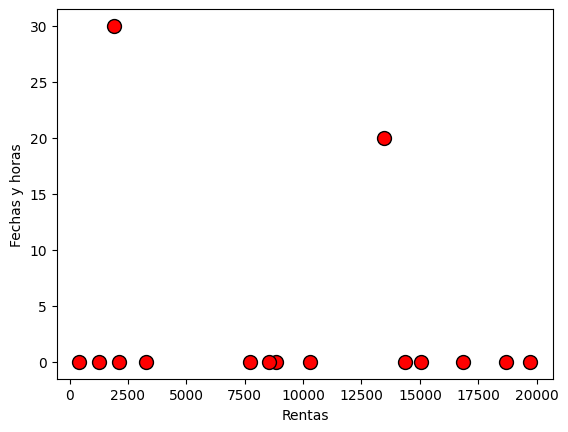

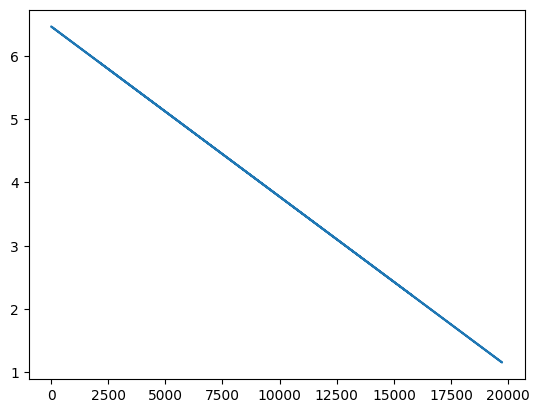

In [ ]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')

SEGUNDA PARTE
Ejercicio de programación Regresión PolinomiaL, importe la libreria de Pandas para converir los strings de las fechas en la y a series númericas

In [ ]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
print(X.shape)
X_array = X.values.reshape(-1,1) # Extract underlying NumPy array and reshape
X_poly = pf.fit_transform(X_array)  # transformamos la entrada en polinómica
print(X_poly.shape)

# Convert datetime strings to numerical timestamps
y_numeric = pd.to_datetime(y).astype(int) / 10**9  # Convert to Unix timestamp

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X_poly, y_numeric) # Use the numerical target variable

# vemos los parámetros que ha estimado la regresión lineal
print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [0 -4.54 4.95 0.1], b = -57.52

(15788, 1)
(15788, 4)
theta = [0.00000000e+00 6.00000003e+02 1.26482248e-10 0.00000000e+00], b = 1452531599.9494512


Remplace X con X_poly para garantizar la coherencia entre los datos de entrenamiento y predicción;
Remplace y con y_numericen la mean_squared_errorfunción

In [ ]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
# Use the polynomial features for prediction
prediccion_entrenamiento = regresion_lineal.predict(X_poly)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_numeric, y_pred = prediccion_entrenamiento) # Use numerical target
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X_poly, y_numeric) # Use polynomial features and numerical target
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 0.0011676108061029276
Raíz del Error Cuadrático Medio (RMSE) = 0.03417032054433976
Coeficiente de Determinación R2 = 0.9999999999999999


In [ ]:
def plotData(X, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Fechas y horas')
    pyplot.xlabel('Rentas')

UsE X.sample() para tomar una muestra aleatoria del 20% de los datos originales. Asegurar de tomar las etiquetas (y_sample) que corresponden a los datos muestreados (X_sample) usando .

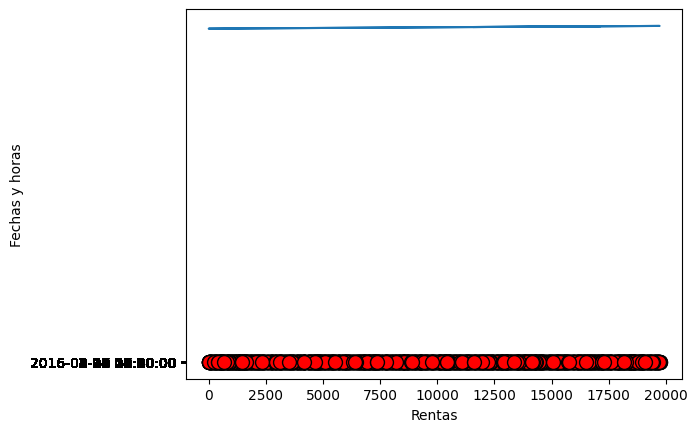

In [ ]:
sample_size = int(0.2 * len(X))
X_sample = X.sample(n=sample_size, random_state=42)  # random_state para reproducibilidad
y_sample = y[X_sample.index]  # Asegúrate de tomar las etiquetas correspondientes

# Convertimos las fechas a números (timestamp)
y_numeric_sample = pd.to_datetime(y_sample).astype(int) / 10**9

# Generamos las características polinómicas para la muestra
X_sample_array = X_sample.values.reshape(-1,1)
X_poly_sample = pf.fit_transform(X_sample_array)

# Entrenamos el modelo con la muestra
regresion_lineal.fit(X_poly_sample, y_numeric_sample)

# ... (código para calcular métricas) ...

# Graficamos los datos de la muestra
plotData(X_sample.iloc[:, 0], y_sample)

# Generamos características polinómicas para el rango de la gráfica (usando la muestra)
X_plot_array = X_sample.iloc[:, 0].values.reshape(-1, 1)
X_plot_poly = pf.transform(X_plot_array)

# Predecimos usando las características polinómicas
y_pred_plot = regresion_lineal.predict(X_plot_poly)

# Graficamos la línea de regresión
pyplot.plot(X_sample.iloc[:, 0], y_pred_plot, '-')

In [ ]:
X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_array = pf.fit_transform(X_array.reshape(-1,1))
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)

[1.4525466e+09]


el calculo por la ecuacion de la normal

<ipython-input-89-f5f976d48f37>:13: RuntimeWarning: overflow encountered in square
  return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y.values.reshape(-1, 1)) ** 2)
<ipython-input-89-f5f976d48f37>:23: RuntimeWarning: overflow encountered in matmul
  gradient = (alpha / m) * (X.T @ (hypothesis(X, theta) - y.values.reshape(-1, 1)))
<ipython-input-89-f5f976d48f37>:24: RuntimeWarning: invalid value encountered in subtract
  theta = theta - gradient


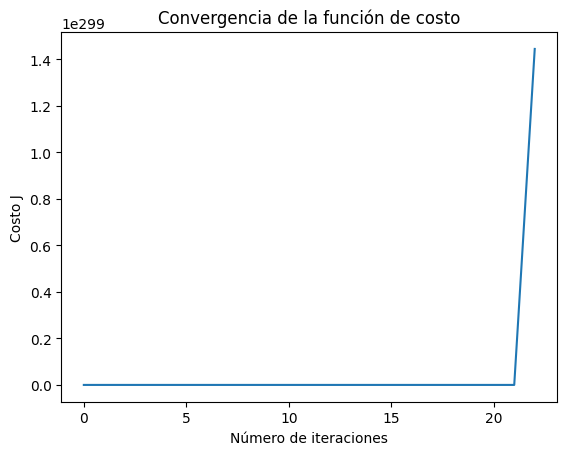

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to handle dates

# Función de hipótesis
def hypothesis(X, theta):
    return X @ theta

# Función de costo
def computeCost(X, y, theta):
    m = len(y)
    # Convertir y a NumPy array
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y.values.reshape(-1, 1)) ** 2)

# Función de descenso de gradiente
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        # Actualización de theta
        # Calculate the gradient
        gradient = (alpha / m) * (X.T @ (hypothesis(X, theta) - y.values.reshape(-1, 1)))
        theta = theta - gradient

        # Guardar el valor del costo en cada iteración
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

# Datos de ejemplo
data = pd.read_csv('/content/gdrive/MyDrive/Data_sets/Lab_2/train.csv', delimiter=',')
X = data.iloc[:, :1]
y = data.iloc[:, 1]

# Convert dates to numerical timestamps
y = pd.to_datetime(y).astype(int) / 10**9  # Convert dates to Unix timestamps

m = y.size
data.head()
# Agregar una columna de unos a X (para el término de sesgo)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

# Inicializar los parámetros theta con ceros
theta = np.zeros((X.shape[1], 1))

# Configuraciones del descenso de gradiente
alpha = 0.01
num_iters = 1500

# Ejecutar el descenso de gradiente
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Graficar la función de costo
plt.plot(J_history)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia de la función de costo')
plt.show()